<a href="https://colab.research.google.com/github/karginb/classifications_with_tensorflow/blob/main/03_convolutional_neural_networks_in_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 03. Convolutional Neural Networks and Computer Vision with TensorFlow

So far we've covered the basics of TensorFlow and built a handful of models to work across different problems.

Now we're going to get specific and see how a special kind of neural network, convolutional neural networks (CNNs) can be used for computer vision (detecting patterns in visual data).

> 🔑 Note: In deep learning, many different kinds of model architectures can be used for different problems. For example, you could use a convolutional neural network for making predictions on image data and/or text data. However, in practice some architectures typically work better than others.

For example, you might want to:

* Classify whether a picture of food contains pizza 🍕 or steak 🥩 (we're going to do this)
* Detect whether or not an object appears in an image (e.g. did a specific car  pass through a security camera?)
In this notebook, we're going to follow the TensorFlow modelling workflow we've been following so far whilst learning about how to build and use CNNs.

What we're going to cover
Specifically, we're going to go through the follow with TensorFlow:

* Getting a dataset to work with
* Architecture of a convolutional neural network
* A quick end-to-end example (what we're working towards)
* Steps in modelling for binary image classification with CNNs
  * Becoming one with the data
  * Preparing data for modelling
  * Creating a CNN model (starting with a baseline)
  * Fitting a model (getting it to find patterns in our data)
  * Evaluating a model
  * Improving a model
  * Making a prediction with a trained model
* Steps in modelling for multi-class image classification with CNNs
* Same as above (but this time with a different dataset)

## Get the Data
Because convolutional neural networks work so well with images, to learn more about them, we're going to start with a dataset of images.

The images we're going to work with are from the Food-101 dataset, a collection of 101 different categories of 101,000 (1000 images per category) real-world images of food dishes.

To begin, we're only going to use two of the categories, pizza 🍕 and steak 🥩 and build a binary classifier.

We'll download the pizza_steak subset .zip file and unzip it.

In [ ]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

zip_ref = zipfile.ZipFile("pizza_steak.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2023-11-03 10:20:05--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.98.207, 74.125.197.207, 74.125.135.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.98.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   176MB/s    in 0.6s    

2023-11-03 10:20:06 (176 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



> 🔑 Note: If you're using Google Colab and your runtime disconnects, you may have to redownload the files. You can do this by rerunning the cell abo

## Inspect the Data
A very crucial step at the beginning of any machine learning project is becoming one with the data. This usually means plenty of visualizing and folder scanning to understand the data you're working with.

Wtih this being said, let's inspect the data we just downloaded.

The file structure has been formatted to be in a typical format you might use for working with images.

More specifically:

* A train directory which contains all of the images in the training dataset with subdirectories each named after a certain class containing images of that class.
* A test directory with the same structure as the train directory.
Example of file structure

pizza_steak <- top level folder
└───train <- training images
│   └───pizza
│   │   │   1008104.jpg
│   │   │   1638227.jpg
│   │   │   ...      
│   └───steak
│       │   1000205.jpg
│       │   1647351.jpg
│       │   ...
│   
└───test <- testing images
│   └───pizza
│   │   │   1001116.jpg
│   │   │   1507019.jpg
│   │   │   ...      
│   └───steak
│       │   100274.jpg
│       │   1653815.jpg
│       │   ...    
Let's inspect each of the directories we've downloaded.

To so do, we can use the command ls which stands for list.

In [ ]:
!ls pizza_steak

test  train


In [ ]:
!ls pizza_steak/train/

pizza  steak


In [ ]:
!ls pizza_steak/train/steak/

1000205.jpg  1598345.jpg  2062248.jpg  2548974.jpg  3030578.jpg  3571963.jpg  510757.jpg
100135.jpg   1598885.jpg  2081995.jpg  2549316.jpg  3047807.jpg  3576078.jpg  513129.jpg
101312.jpg   1600179.jpg  2087958.jpg  2561199.jpg  3059843.jpg  3577618.jpg  513842.jpg
1021458.jpg  1600794.jpg  2088030.jpg  2563233.jpg  3074367.jpg  3577732.jpg  523535.jpg
1032846.jpg  160552.jpg   2088195.jpg  256592.jpg   3082120.jpg  3578934.jpg  525041.jpg
10380.jpg    1606596.jpg  2090493.jpg  2568848.jpg  3094354.jpg  358042.jpg   534560.jpg
1049459.jpg  1615395.jpg  2090504.jpg  2573392.jpg  3095301.jpg  358045.jpg   534633.jpg
1053665.jpg  1618011.jpg  2125877.jpg  2592401.jpg  3099645.jpg  3591821.jpg  536535.jpg
1068516.jpg  1619357.jpg  2129685.jpg  2599817.jpg  3100476.jpg  359330.jpg   541410.jpg
1068975.jpg  1621763.jpg  2133717.jpg  2603058.jpg  3110387.jpg  3601483.jpg  543691.jpg
1081258.jpg  1623325.jpg  2136662.jpg  2606444.jpg  3113772.jpg  3606642.jpg  560503.jpg
1090122.jpg  1624450.

In [ ]:
import os

for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.


In [ ]:
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))

num_steak_images_train

750

In [ ]:
import pathlib
import numpy as np

data_dir = pathlib.Path("pizza_steak/train/") # turn our training path into a Python path
class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) # created a list of class_names from the subdirectory
print(class_names)

['pizza' 'steak']


> 🤔 Note: Whenever you're working with data, it's always good to visualize it as much as possible. Treat your first couple of steps of a project as becoming one with the data. Visualize, visualize, visualize.

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):

  target_folder = target_dir + target_class

  random_image = random.sample(os.listdir(target_folder), 1)

  img = mpimg.imread(target_folder + "/" + random_image[0]) # we used as random_image[0] because we need string type here
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")
  plt.show()

  print(f"Image shape: {img.shape}")

  return img

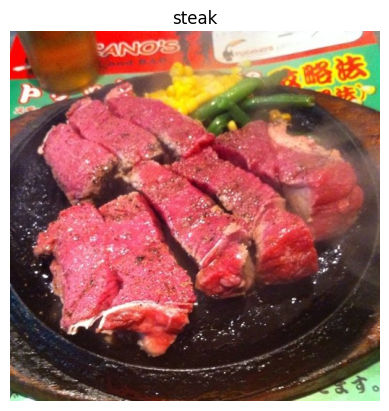

Image shape: (512, 512, 3)


In [ ]:
  img = view_random_image(target_dir = "pizza_steak/train/", target_class = "steak")

In [ ]:
img

array([[[ 77, 110, 115],
        [ 91, 118, 127],
        [ 97, 108, 128],
        ...,
        [141, 143, 130],
        [144, 140, 131],
        [143, 136, 128]],

       [[ 90, 119, 125],
        [ 92, 114, 125],
        [ 95, 103, 124],
        ...,
        [141, 141, 129],
        [146, 142, 133],
        [147, 140, 132]],

       [[106, 125, 132],
        [104, 118, 129],
        [101, 106, 126],
        ...,
        [142, 142, 130],
        [149, 145, 136],
        [152, 145, 137]],

       ...,

       [[181, 239, 191],
        [194, 252, 202],
        [193, 252, 204],
        ...,
        [180, 251, 195],
        [179, 249, 195],
        [179, 249, 195]],

       [[186, 242, 197],
        [193, 251, 203],
        [191, 250, 204],
        ...,
        [183, 252, 197],
        [183, 252, 198],
        [183, 251, 200]],

       [[191, 247, 202],
        [199, 255, 211],
        [191, 248, 203],
        ...,
        [185, 254, 199],
        [185, 253, 202],
        [185, 253, 202]]

In [ ]:
img.shape

(512, 512, 3)

Looking at the image shape more closely, you'll see it's in the form (Width, Height, Colour Channels).

In our case, the width and height vary but because we're dealing with colour images, the colour channels value is always 3. This is for different values of red, green and blue (RGB) pixels.

You'll notice all of the values in the img array are between 0 and 255. This is because that's the possible range for red, green and blue values.

For example, a pixel with a value red=0, green=0, blue=255 will look very blue.

So when we build a model to differentiate between our images of pizza and steak, it will be finding patterns in these different pixel values which determine what each class looks like.

> 🔑 Note: As we've discussed before, many machine learning models, including neural networks prefer the values they work with to be between 0 and 1. Knowing this, one of the most common preprocessing steps for working with images is to scale (also referred to as normalize) their pixel values by dividing the image arrays by 255.

In [ ]:
img/255

array([[[0.30196078, 0.43137255, 0.45098039],
        [0.35686275, 0.4627451 , 0.49803922],
        [0.38039216, 0.42352941, 0.50196078],
        ...,
        [0.55294118, 0.56078431, 0.50980392],
        [0.56470588, 0.54901961, 0.51372549],
        [0.56078431, 0.53333333, 0.50196078]],

       [[0.35294118, 0.46666667, 0.49019608],
        [0.36078431, 0.44705882, 0.49019608],
        [0.37254902, 0.40392157, 0.48627451],
        ...,
        [0.55294118, 0.55294118, 0.50588235],
        [0.57254902, 0.55686275, 0.52156863],
        [0.57647059, 0.54901961, 0.51764706]],

       [[0.41568627, 0.49019608, 0.51764706],
        [0.40784314, 0.4627451 , 0.50588235],
        [0.39607843, 0.41568627, 0.49411765],
        ...,
        [0.55686275, 0.55686275, 0.50980392],
        [0.58431373, 0.56862745, 0.53333333],
        [0.59607843, 0.56862745, 0.5372549 ]],

       ...,

       [[0.70980392, 0.9372549 , 0.74901961],
        [0.76078431, 0.98823529, 0.79215686],
        [0.75686275, 0

## A typical architecture of a convolutional neural network

Convolutional neural networks are no different to other kinds of deep learning neural networks in the fact they can be created in many different ways. What you see below are some components you'd expect to find in a traditional CNN.

Components of a convolutional neural network:
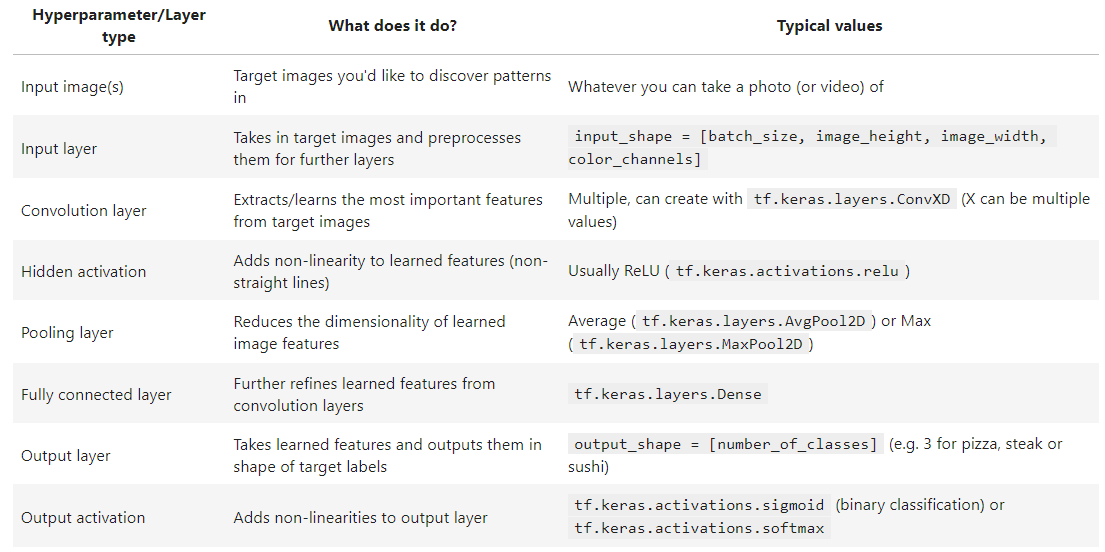

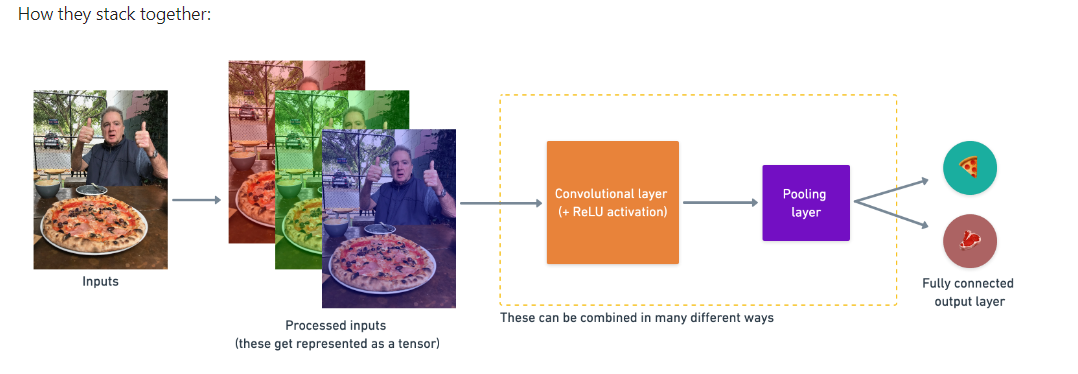

A simple example of how you might stack together the above layers into a convolutional and pooling layers can often be arranged and rearranged into many different formations

## An end to end example

We've checked out our data and found there's 750 training images, as well as 250 test images per class and they're all of various different shapes.

It's time to jump straight in the deep end.

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)

train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size = 32,
                                               target_size = (224,224),
                                               class_mode = "binary",
                                               seed = 42)

valid_data = valid_datagen.flow_from_directory(test_dir,
                                              batch_size = 32,
                                              target_size = (224,224),
                                              class_mode = "binary",                                              seed = 42)

model_1 = tf.keras.Sequential()

model_1.add(tf.keras.layers.Conv2D(filters=10,
                                   kernel_size = 3, # can also be (3,3)
                                   activation = "relu",
                                   input_shape = (224, 224, 3)))
model_1.add(tf.keras.layers.Conv2D(10, 3, activation = "relu"))
model_1.add(tf.keras.layers.MaxPool2D(pool_size=2, # can also be (2,2)
                                      padding = "valid")) # can also be "same"
model_1.add(tf.keras.layers.Conv2D(10, 3, activation = "relu"))
model_1.add(tf.keras.layers.Conv2D(10, 3, activation = "relu"))
model_1.add(tf.keras.layers.MaxPool2D(2))
model_1.add(tf.keras.layers.Flatten())
model_1.add(tf.keras.layers.Dense(1, activation = "sigmoid"))


model_1.compile(loss = "binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

history_1 = model_1.fit(train_data,
                        epochs = 5,
                        steps_per_epoch = len(train_data),
                        validation_data = valid_data,
                        validation_steps = len(valid_data))


Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 18s 134ms/step - loss: 0.5712 - accuracy: 0.7127 - val_loss: 0.4272 - val_accuracy: 0.8120
Epoch 2/5
47/47 [==============================] - 6s 130ms/step - loss: 0.4562 - accuracy: 0.7907 - val_loss: 0.3957 - val_accuracy: 0.8360
Epoch 3/5
47/47 [==============================] - 5s 113ms/step - loss: 0.4206 - accuracy: 0.8193 - val_loss: 0.3719 - val_accuracy: 0.8480
Epoch 4/5
47/47 [==============================] - 7s 144ms/step - loss: 0.3441 - accuracy: 0.8640 - val_loss: 0.3514 - val_accuracy: 0.8520
Epoch 5/5
47/47 [==============================] - 5s 113ms/step - loss: 0.2676 - accuracy: 0.9013 - val_loss: 0.3721 - val_accuracy: 0.8400


> 🤔 Note: If the cell above takes more than ~12 seconds per epoch to run, you might not be using a GPU accelerator. If you're using a Colab notebook, you can access a GPU accelerator by going to Runtime -> Change Runtime Type -> Hardware Accelerator and select "GPU". After doing so, you might have to rerun all of the above cells as changing the runtime type causes Colab to have to reset.

In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 10)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 53, 53, 10)        0         
 g2D)                                                   

## Using the Same Model as Before

To examplify how neural networks can be adapted to many different problems, let's see how a binary classification model we've previously built might work with our data.

We can use all of the same parameters in our previous model except for changing two things:

* The data - we're now working with images instead of dots.
* The input shape - we have to tell our neural network the shape of the images we're working with.

  *  A common practice is to reshape images all to one size. In our case, we'll resize the images to (224, 224, 3), meaning a height and width of 224 pixels and a depth of 3 for the red, green, blue colour channels.

In [ ]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential()

model_2.add(tf.keras.layers.Flatten(input_shape = (224, 224, 3)))
model_2.add(tf.keras.layers.Dense(4, activation = "relu"))
model_2.add(tf.keras.layers.Dense(4, activation = "relu"))
model_2.add(tf.keras.layers.Dense(1, activation = "sigmoid"))

model_2.compile(loss = "binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

history_2 = model_2.fit(train_data,
            epochs = 5,
            steps_per_epoch = len(train_data),
            validation_data = valid_data,
            validation_steps = len(valid_data))


Epoch 1/5
47/47 [==============================] - 8s 137ms/step - loss: 0.6933 - accuracy: 0.4973 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 6s 132ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 6s 121ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 6s 122ms/step - loss: 0.6932 - accuracy: 0.4853 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 6s 123ms/step - loss: 0.6932 - accuracy: 0.4893 - val_loss: 0.6931 - val_accuracy: 0.5000


Hmmm... our model ran but it doesn't seem like it learned anything. It only reaches 50% accuracy on the training and test sets which in a binary classification problem is as good as guessing.

Let's see the architecture

In [ ]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 4)                 602116    
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602141 (2.30 MB)
Trainable params: 602141 (2.30 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


> 🔑 Note: You can think of trainable parameters as patterns a model can learn from data. Intuitiely, you might think more is better. And in some cases it is. But in this case, the difference here is in the two different styles of model we're using. Where a series of dense layers have a number of different learnable parameters connected to each other and hence a higher number of possible learnable patterns, a convolutional neural network seeks to sort out and learn the most important patterns in an image. So even though there are less learnable parameters in our convolutional neural network, these are often more helpful in decphering between different features in an image.

Since our previous model didn't work, do you have any ideas of how we might make it work?

How about we increase the number of layers?

And maybe even increase the number of neurons in each layer?

More specifically, we'll increase the number of neurons (also called hidden units) in each dense layer from 4 to 100 and add an extra layer.

In [ ]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential()

model_3.add(tf.keras.layers.Flatten(input_shape = (224, 224, 3)))
model_3.add(tf.keras.layers.Dense(100, activation = "relu"))
model_3.add(tf.keras.layers.Dense(100, activation = "relu"))
model_3.add(tf.keras.layers.Dense(100, activation = "relu"))
model_3.add(tf.keras.layers.Dense(1, activation = "sigmoid"))

model_3.compile(loss = "binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

history_3 = model_2.fit(train_data,
            epochs = 5,
            steps_per_epoch = len(train_data),
            validation_data = valid_data,
            validation_steps = len(valid_data))


Epoch 1/5
47/47 [==============================] - 5s 107ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 6s 121ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 5s 105ms/step - loss: 0.6932 - accuracy: 0.4800 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 7s 143ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 5s 104ms/step - loss: 0.6932 - accuracy: 0.4920 - val_loss: 0.6931 - val_accuracy: 0.5000


In [ ]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_4 (Dense)             (None, 100)               15052900  
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15073201 (57.50 MB)
Trainable params: 15073201 (57.50 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


the number of trainable parameters has increased even more than model_2. And even with close to 500x (~15,000,000 vs. ~31,000) more trainable parameters, model_3 still doesn't out perform model_1.

This goes to show the power of convolutional neural networks and their ability to learn patterns despite using less parameters.

## Binary classification: Let's break it down

We just went through a whirlwind of steps:

1.Become one with the data (visualize, visualize, visualize...)

2.Preprocess the data (prepare it for a model)

3.Create a model (start with a baseline)

4.Fit the model

5.Evaluate the model

6.Adjust different parameters and improve model (try to beat your baseline)

7.Repeat until satisfied

Let's step through each.



## 1. Import and become one with the data
Whatever kind of data you're dealing with, it's a good idea to visualize at least 10-100 samples to start to building your own mental model of the data.

In our case, we might notice that the steak images tend to have darker colours where as pizza images tend to have a distinct circular shape in the middle. These might be patterns that our neural network picks up on.

You an also notice if some of your data is messed up (for example, has the wrong label) and start to consider ways you might go about fixing it.

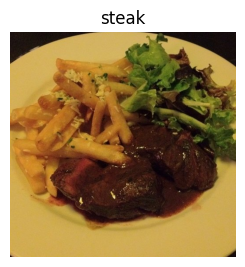

Image shape: (512, 512, 3)


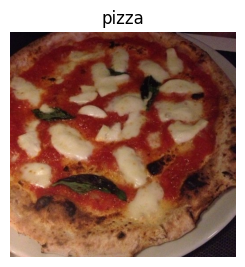

Image shape: (512, 512, 3)


In [ ]:
plt.figure()
plt.subplot(1, 2, 1)
steak_img = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1, 2, 2)
pizza_img = view_random_image("pizza_steak/train/", "pizza")
plt.show()

## 2. Preprocess the data (prepare it for a model)
One of the most important steps for a machine learning project is creating a training and test set.

In our case, our data is already split into training and test sets. Another option here might be to create a validation set as well, but we'll leave that for now.

For an image classification project, it's standard to have your data seperated into train and test directories with subfolders in each for each class.

To start we define the training and test directory paths.

In [ ]:
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"


Our next step is to turn our data into batches.

A batch is a small subset of the dataset a model looks at during training. For example, rather than looking at 10,000 images at one time and trying to figure out the patterns, a model might only look at 32 images at a time.

It does this for a couple of reasons:

10,000 images (or more) might not fit into the memory of your processor (GPU).
Trying to learn the patterns in 10,000 images in one hit could result in the model not being able to learn very well.
Why 32?

A "batch size of 32 is good for your health."

No seriously, there are many different batch sizes you could use but 32 has proven to be very effective in many different use cases and is often the default for many data preprocessing functions.

To turn our data into batches, we'll first create an instance of **ImageDataGenerator** for each of our datasets.

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1/255)
test_datagen = ImageDataGenerator(rescale = 1/255)


The ImageDataGenerator class helps us prepare our images into batches as well as perform transformations on them as they get loaded into the model.

You might've noticed the rescale parameter. This is one example of the transformations we're doing.

Remember from before how we imported an image and it's pixel values were between 0 and 255?

The rescale parameter, along with 1/255. is like saying "divide all of the pixel values by 255". This results in all of the image being imported and their pixel values being normalized (converted to be between 0 and 1).


Now we've got a couple of ImageDataGenerator instances, we can load our images from their respective directories using the flow_from_directory method.

In [ ]:
train_data = train_datagen.flow_from_directory(directory = train_dir,
                                               target_size = (224, 224),
                                               class_mode = "binary",
                                               batch_size = 32)

test_data = test_datagen.flow_from_directory(directory = test_dir,
                                             target_size = (224, 224),
                                             class_mode = "binary",
                                             batch_size = 32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


Wonderful! Looks like our training dataset has 1500 images belonging to 2 classes (pizza and steak) and our test dataset has 500 images also belonging to 2 classes.

Some things to here:

* Due to how our directories are structured, the classes get inferred by the subdirectory names in train_dir and test_dir.
* The target_size parameter defines the input size of our images in (height, width) format.
* The class_mode value of 'binary' defines our classification problem type. If we had more than two classes, we would use 'categorical'.
* The batch_size defines how many images will be in each batch, we've used 32 which is the same as the default.

We can take a look at our batched images and labels by inspecting the train_data object.

In [ ]:
# Get a sample of the training data batch
images, labels = train_data.next() # get the 'next' batch of images/labels
len(images), len(labels)

(32, 32)

In [ ]:
images[:2], images.shape

(array([[[[0.07843138, 0.05882353, 0.07450981],
          [0.05882353, 0.03921569, 0.05490196],
          [0.05882353, 0.0509804 , 0.0627451 ],
          ...,
          [0.37254903, 0.3647059 , 0.36862746],
          [0.36862746, 0.36078432, 0.3647059 ],
          [0.37254903, 0.3647059 , 0.36862746]],
 
         [[0.05882353, 0.03921569, 0.05490196],
          [0.04705883, 0.02745098, 0.04313726],
          [0.04313726, 0.03529412, 0.04705883],
          ...,
          [0.3803922 , 0.37254903, 0.37647063],
          [0.3921569 , 0.38431376, 0.38823533],
          [0.40000004, 0.3921569 , 0.39607847]],
 
         [[0.05490196, 0.03529412, 0.0509804 ],
          [0.04705883, 0.02745098, 0.04313726],
          [0.03529412, 0.02745098, 0.03921569],
          ...,
          [0.38431376, 0.37647063, 0.3803922 ],
          [0.39607847, 0.38823533, 0.3921569 ],
          [0.4039216 , 0.39607847, 0.40000004]],
 
         ...,
 
         [[0.07058824, 0.06666667, 0.09019608],
          [0.06666

In [ ]:
labels

array([1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 1., 1.,
       0., 1., 1., 1., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0.],
      dtype=float32)

## 3. Create a model (start with a baseline)
You might be wondering what your default model architecture should be.

And the truth is, there's many possible answers to this question.

A simple heuristic for computer vision models is to use the model architecture which is performing best on ImageNet (a large collection of diverse images to benchmark different computer vision models).

However, to begin with, it's good to build a smaller model to acquire a baseline result which you try to improve upon.

> 🔑 Note: In deep learning a smaller model often refers to a model with less layers than the state of the art (SOTA). For example, a smaller model might have 3-4 layers where as a state of the art model, such as, ResNet50 might have 50+ layers.

In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Activation, Flatten
from tensorflow.keras import Sequential

In [ ]:
model_4 = Sequential([
    Conv2D(filters = 10,
           kernel_size = 3,
           strides = 1,
           padding = "valid",
           activation = "relu",
           input_shape = (224, 224, 3)),
    Conv2D(10, 3, activation = "relu"),
    Conv2D(10, 3, activation = "relu"),
    Flatten(),
    Dense(1, activation = "sigmoid")
])

Great! We've got a simple convolutional neural network architecture ready to go.

And it follows the typical CNN structure of:

Input -> Conv + ReLU layers (non-linearities) -> Pooling layer -> Fully connected (dense layer) as Output
Let's discuss some of the components of the Conv2D layer:

* The "2D" means our inputs are two dimensional (height and width), even though they have 3 colour channels, the convolutions are run on each channel invididually.
* filters - these are the number of "feature extractors" that will be moving over our images.
* kernel_size - the size of our filters, for example, a kernel_size of (3, 3) (or just 3) will mean each filter will have the size 3x3, meaning it will look at a space of 3x3 pixels each time. The smaller the kernel, the more fine-grained features it will extract.
* stride - the number of pixels a filter will move across as it covers the image. A stride of 1 means the filter moves across each pixel 1 by 1. A stride of 2 means it moves 2 pixels at a time.
* padding - this can be either 'same' or 'valid', 'same' adds zeros the to outside of the image so the resulting output of the convolutional layer is the same as the input, where as 'valid' (default) cuts off excess pixels where the filter doesn't fit (e.g. 224 pixels wide divided by a kernel size of 3 (224/3 = 74.6) means a single pixel will get cut off the end


What's a "feature"?

A feature can be considered any significant part of an image. For example, in our case, a feature might be the circular shape of pizza. Or the rough edges on the outside of a steak.

It's important to note that these features are not defined by us, instead, the model learns them as it applies different filters across the image.


Now our model is ready, let's compile it.

In [ ]:
model_4.compile(loss = "binary_crossentropy",
                optimizer = Adam(),
                metrics = ["accuracy"])


Since we're working on a binary classification problem (pizza vs. steak), the loss function we're using is 'binary_crossentropy', if it was mult-iclass, we might use something like 'categorical_crossentropy'.

Adam with all the default settings is our optimizer and our evaluation metric is accuracy.

## 4. Fit a model
Our model is compiled, time to fit it.

You'll notice two new parameters here:

* steps_per_epoch - this is the number of batches a model will go through per epoch, in our case, we want our model to go through all batches so it's equal to the length of train_data (1500 images in batches of 32 = 1500/32 = ~47 steps)
* validation_steps - same as above, except for the validation_data parameter (500 test images in batches of 32 = 500/32 = ~16 steps)

In [ ]:
len(train_data), len(test_data)

(47, 16)

In [ ]:
history_4 = model_4.fit(train_data,
                        epochs = 5,
                        steps_per_epoch = len(train_data),
                        validation_data = test_data,
                        validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - 8s 127ms/step - loss: 1.3859 - accuracy: 0.5867 - val_loss: 0.6191 - val_accuracy: 0.7140
Epoch 2/5
47/47 [==============================] - 6s 130ms/step - loss: 0.5486 - accuracy: 0.7280 - val_loss: 0.4882 - val_accuracy: 0.7620
Epoch 3/5
47/47 [==============================] - 6s 120ms/step - loss: 0.4483 - accuracy: 0.7993 - val_loss: 0.5144 - val_accuracy: 0.7520
Epoch 4/5
47/47 [==============================] - 6s 124ms/step - loss: 0.3340 - accuracy: 0.8607 - val_loss: 0.4663 - val_accuracy: 0.7780
Epoch 5/5
47/47 [==============================] - 6s 132ms/step - loss: 0.2198 - accuracy: 0.9267 - val_loss: 0.5086 - val_accuracy: 0.7860


## 5. Evaluate the model
Oh yeah! Looks like our model is learning something.

Let's check out its training curves.

<Axes: >

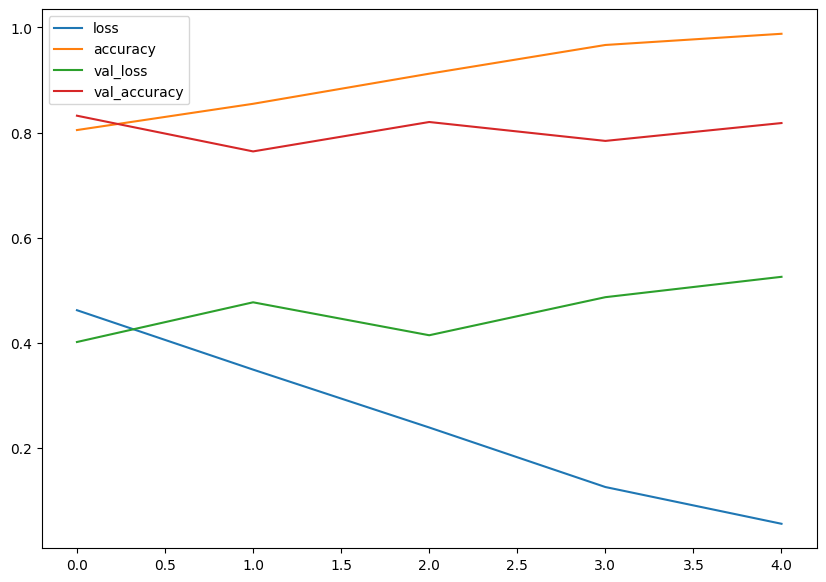

In [ ]:
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize = (10,7))

Hmm, judging by our loss curves, it looks like our model is overfitting the training dataset.

>🔑 Note: When a model's validation loss starts to increase, it's likely that it's overfitting the training dataset. This means, it's learning the patterns in the training dataset too well and thus its ability to generalize to unseen data will be diminished.

To further inspect our model's training performance, let's separate the accuracy and loss curves.

In [ ]:
def plot_loss(history):
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"]))

  plt.plot(epochs, loss, label = "Trainig Loss")
  plt.plot(epochs, val_loss, label = "Validation Loss")
  plt.title("Loss")
  plt.xlabel("Epochs")
  plt.legend()

  plt.figure()

  plt.plot(epochs, accuracy, label = "Accuracy")
  plt.plot(epochs, val_accuracy, label = "Validation Accuracy")
  plt.title("Accuracy")
  plt.xlabel("Epochs")
  plt.legend()
  plt.show()

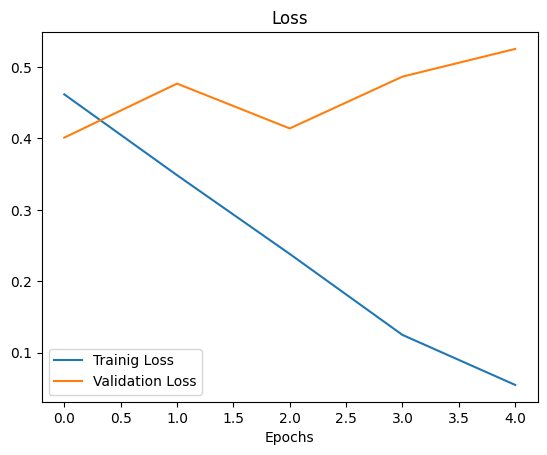

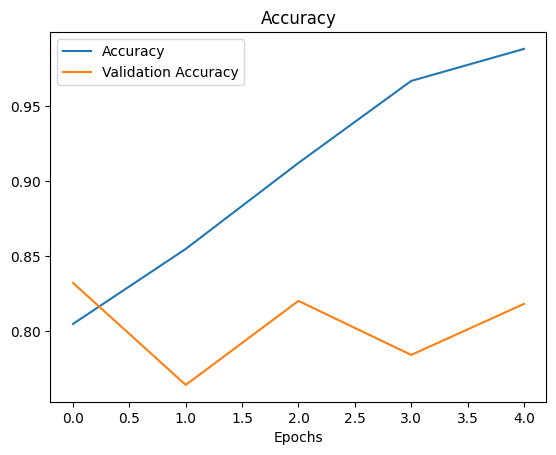

In [ ]:
plot_loss(history_4)

The ideal position for these two curves is to follow each other. If anything, the validation curve should be slightly under the training curve. If there's a large gap between the training curve and validation curve, it means your model is probably overfitting.

In [ ]:
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_3 (Flatten)         (None, 475240)            0         
                                                                 
 dense_8 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477341 (1.82 MB)
Trainable params: 477341 (1.82 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## 6. Adjust the model parameters
Fitting a machine learning model comes in 3 steps: 0. Create a basline.

Beat the baseline by overfitting a larger model.
Reduce overfitting.
So far we've gone through steps 0 and 1.

And there are even a few more things we could try to further overfit our model:

* Increase the number of convolutional layers.
* Increase the number of convolutional filters.

Add another dense layer to the output of our flattened layer.
But what we'll do instead is focus on getting our model's training curves to better align with eachother, in other words, we'll take on step 2.

Why is reducing overfitting important?

When a model performs too well on training data and poorly on unseen data, it's not much use to us if we wanted to use it in the real world.

Say we were building a pizza vs. steak food classifier app, and our model performs very well on our training data but when users tried it out, they didn't get very good results on their own food images, is that a good experience?

Not really...

So for the next few models we build, we're going to adjust a number of parameters and inspect the training curves along the way.

Namely, we'll build 2 more models:
* A ConvNet with max pooling
* A ConvNet with max pooling and data augmentation

For the first model, we'll follow the modified basic CNN structure:

Input -> Conv layers + ReLU layers (non-linearities) + Max Pooling layers -> Fully connected (dense layer) as Output

Let's built it. It'll have the same structure as model_4 but with a MaxPool2D() layer after each convolutional layer.


In [ ]:
model_5 = Sequential([
    Conv2D(10, 3, activation = "relu", input_shape = (224, 224, 3)),
    MaxPool2D(),
    Conv2D(10, 3, activation = "relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation = "relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation = "sigmoid")
])

Woah, we've got another layer type we haven't seen before.

If convolutional layers learn the features of an image you can think of a Max Pooling layer as figuring out the most important of those features. We'll see this an example of this in a moment.

In [ ]:
model_5.compile(loss = "binary_crossentropy",
                optimizer = Adam(),
                metrics = ["accuracy"])


In [ ]:
history_5 = model_5.fit(train_data,
            epochs = 5,
            steps_per_epoch = len(train_data),
            validation_data = test_data,
            validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - 9s 162ms/step - loss: 0.6236 - accuracy: 0.6413 - val_loss: 0.4518 - val_accuracy: 0.7800
Epoch 2/5
47/47 [==============================] - 5s 110ms/step - loss: 0.4292 - accuracy: 0.8133 - val_loss: 0.3414 - val_accuracy: 0.8560
Epoch 3/5
47/47 [==============================] - 5s 107ms/step - loss: 0.4119 - accuracy: 0.8200 - val_loss: 0.3415 - val_accuracy: 0.8400
Epoch 4/5
47/47 [==============================] - 6s 126ms/step - loss: 0.3700 - accuracy: 0.8353 - val_loss: 0.3252 - val_accuracy: 0.8500
Epoch 5/5
47/47 [==============================] - 5s 111ms/step - loss: 0.3500 - accuracy: 0.8573 - val_loss: 0.3198 - val_accuracy: 0.8700


In [ ]:
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 111, 111, 10)      0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 54, 54, 10)        0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 26, 26, 10)       

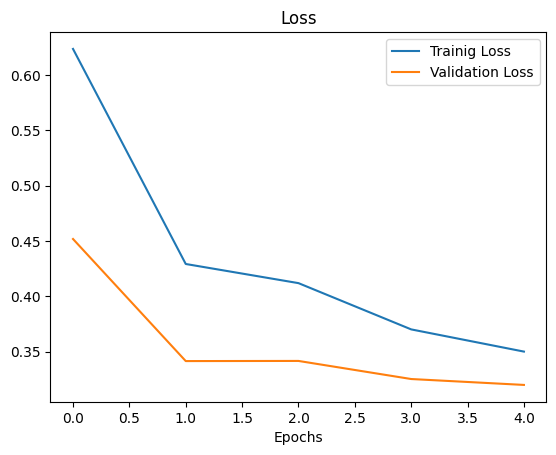

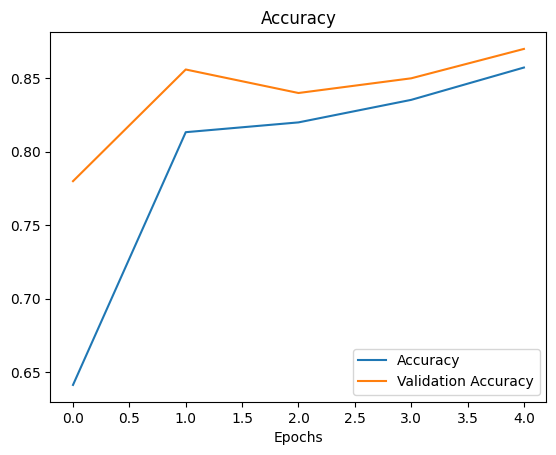

In [ ]:
plot_loss(history_5)

Nice! We can see the training curves get a lot closer to eachother. However, our the validation loss looks to start increasing towards the end and in turn potentially leading to overfitting.

Time to dig into our bag of tricks and try another method of overfitting prevention, data augmentation.

First, we'll see how it's done with code then we'll discuss what it's doing.

To implement data augmentation, we'll have to reinstantiate our ImageDataGenerator instances.

In [ ]:
train_datagen_augmented = ImageDataGenerator(rescale = 1/255.,
                                             rotation_range = 20,
                                             shear_range = 0.2,
                                             zoom_range = 0.2,
                                             width_shift_range = 0.2,
                                             height_shift_range = 0.2,
                                             horizontal_flip = True)

train_datagen = ImageDataGenerator(rescale = 1/255.)
test_datagen = ImageDataGenerator(rescale = 1/255.)

>🤔 Question: What's data augmentation?

Data augmentation is the process of altering our training data, leading to it having more diversity and in turn allowing our models to learn more generalizable patterns. Altering might mean adjusting the rotation of an image, flipping it, cropping it or something similar.

Doing this simulates the kind of data a model might be used on in the real world.

If we're building a pizza vs. steak application, not all of the images our users take might be in similar setups to our training data. Using data augmentation gives us another way to prevent overfitting and in turn make our model more generalizable.

>🔑 Note: Data augmentation is usally only performed on the training data. Using the ImageDataGenerator built-in data augmentation parameters our images are left as they are in the directories but are randomly manipulated when loaded into the model.

In [ ]:
print("Augmented Training Images:")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size = (224, 224),
                                                                   batch_size = 32,
                                                                   class_mode = "binary",
                                                                   shuffle = "False")

print("Non-augmented Training Images:")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size = (224, 224),
                                               batch_size = 32,
                                               class_mode = "binary",
                                               shuffle = "False")

print("Unchanged Test Images:")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size = (224, 224),
                                             batch_size = 32,
                                             class_mode = "binary")

Augmented Training Images:
Found 1500 images belonging to 2 classes.
Non-augmented Training Images:
Found 1500 images belonging to 2 classes.
Unchanged Test Images:
Found 500 images belonging to 2 classes.


In [ ]:
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next()

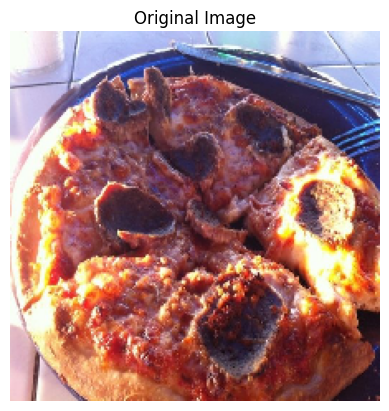

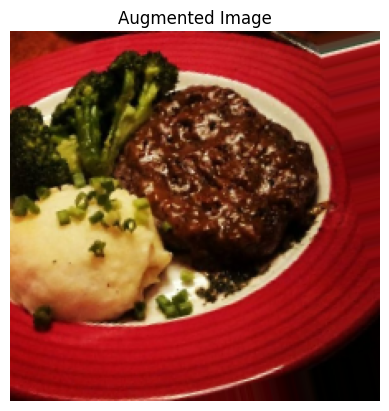

In [ ]:
random_number = random.randint(0,31)
plt.imshow(images[random_number])
plt.title("Original Image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title("Augmented Image")
plt.axis(False)
plt.show()

After going through a sample of original and augmented images, you can start to see some of the example transformations on the training images.

Notice how some of the augmented images look like slightly warped versions of the original image. This means our model will be forced to try and learn patterns in less-than-perfect images, which is often the case when using real-world images.

>🤔 Question: Should I use data augmentation? And how much should I augment?

Data augmentation is a way to try and prevent a model overfitting. If your model is overfiting (e.g. the validation loss keeps increasing), you may want to try using data augmentation.

As for how much to data augment, there's no set practice for this. Best to check out the options in the ImageDataGenerator class and think about how a model in your use case might benefit from some data augmentation.

Now we've got augmented data, let's try and refit a model on it and see how it affects training.

We'll use the same model as model_5.

In [ ]:
model_6 = Sequential([
    Conv2D(filters = 10, kernel_size = 3, activation = "relu", input_shape = (224, 224, 3)),
    MaxPool2D(pool_size = 2),
    Conv2D(10, 3, activation = "relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation = "relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation = "sigmoid")
])

model_6.compile(loss = "binary_crossentropy",
                optimizer = Adam(),
                metrics = ["accuracy"])

history_6 = model_6.fit(train_data_augmented,
                        epochs = 5,
                        steps_per_epoch = len(train_data_augmented),
                        validation_data = test_data,
                        validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - 87s 2s/step - loss: 0.6688 - accuracy: 0.5827 - val_loss: 0.5848 - val_accuracy: 0.7080
Epoch 2/5
47/47 [==============================] - 87s 2s/step - loss: 0.5596 - accuracy: 0.7213 - val_loss: 0.4155 - val_accuracy: 0.8280
Epoch 3/5
47/47 [==============================] - 86s 2s/step - loss: 0.4894 - accuracy: 0.7700 - val_loss: 0.3584 - val_accuracy: 0.8540
Epoch 4/5
47/47 [==============================] - 87s 2s/step - loss: 0.4936 - accuracy: 0.7560 - val_loss: 0.3620 - val_accuracy: 0.8520
Epoch 5/5
47/47 [==============================] - 86s 2s/step - loss: 0.4799 - accuracy: 0.7740 - val_loss: 0.3501 - val_accuracy: 0.8500


>🤔 Question: Why didn't our model get very good results on the training set to begin with?

It's because when we created train_data_augmented we turned off data shuffling using shuffle=False which means our model only sees a batch of a single kind of images at a time.

For example, the pizza class gets loaded in first because it's the first class. Thus it's performance is measured on only a single class rather than both classes. The validation data performance improves steadily because it contains shuffled data.

Since we only set shuffle=False for demonstration purposes (so we could plot the same augmented and non-augmented image), we can fix this by setting shuffle=True on future data generators.

You may have also noticed each epoch taking longer when training with augmented data compared to when training with non-augmented data (~25s per epoch vs. ~10s per epoch).

This is because the ImageDataGenerator instance augments the data as it's loaded into the model. The benefit of this is that it leaves the original images unchanged. The downside is that it takes longer to load them in.

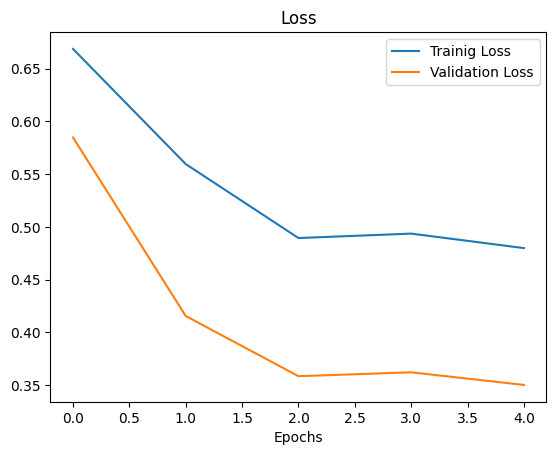

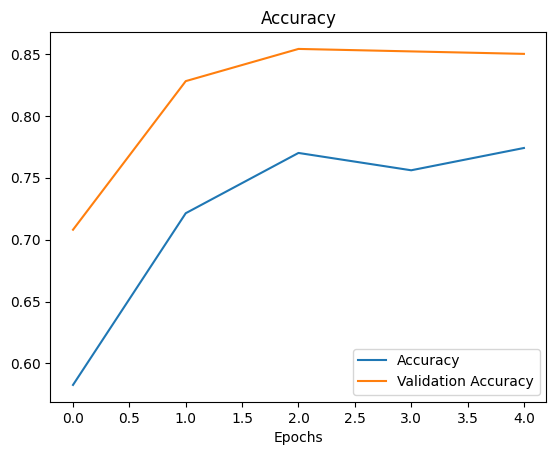

In [ ]:
plot_loss(history_6)

In [ ]:
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                target_size = (224, 224),
                                                                batch_size = 32,
                                                                class_mode = "binary",
                                                                shuffle = True)

Found 1500 images belonging to 2 classes.


In [ ]:
model_7 = Sequential([
    Conv2D(filters = 10, kernel_size = 3, activation = "relu", input_shape = (224, 224, 3)),
    MaxPool2D(pool_size = 2),
    Conv2D(10, 3, activation = "relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation = "relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation = "sigmoid")
])

model_7.compile(loss = "binary_crossentropy",
                optimizer = Adam(),
                metrics = ["accuracy"])

history_7 = model_7.fit(train_data_augmented,
                        epochs = 5,
                        steps_per_epoch = len(train_data_augmented),
                        validation_data = test_data,
                        validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - 21s 415ms/step - loss: 0.6731 - accuracy: 0.5947 - val_loss: 0.5289 - val_accuracy: 0.7700
Epoch 2/5
47/47 [==============================] - 21s 445ms/step - loss: 0.5850 - accuracy: 0.7047 - val_loss: 0.4730 - val_accuracy: 0.7700
Epoch 3/5
47/47 [==============================] - 21s 439ms/step - loss: 0.5208 - accuracy: 0.7627 - val_loss: 0.3880 - val_accuracy: 0.8440
Epoch 4/5
47/47 [==============================] - 22s 462ms/step - loss: 0.5091 - accuracy: 0.7660 - val_loss: 0.3570 - val_accuracy: 0.8640
Epoch 5/5
47/47 [==============================] - 21s 446ms/step - loss: 0.4853 - accuracy: 0.7600 - val_loss: 0.3833 - val_accuracy: 0.8160


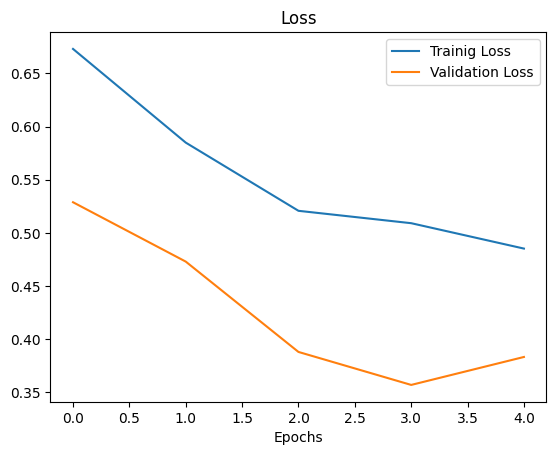

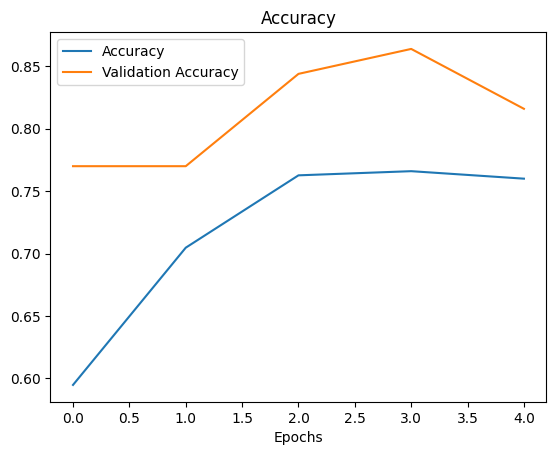

In [ ]:
plot_loss(history_7)

Notice with model_7 how the performance on the training dataset improves almost immediately compared to model_6. This is because we shuffled the training data as we passed it to the model using the parameter shuffle=True in the flow_from_directory method.

This means the model was able to see examples of both pizza and steak images in each batch and in turn be evaluated on what it learned from both images rather than just one kind.

Also, our loss curves look a little bit smoother with shuffled data (comparing history_6 to history_7).

## 7. Repeat until satisified
We've trained a few model's on our dataset already and so far they're performing pretty good.

Since we've already beaten our baseline, there are a few things we could try to continue to improve our model:

* Increase the number of model layers (e.g. add more convolutional layers).
* Increase the number of filters in each convolutional layer (e.g. from 10 to 32, 64, or 128, these numbers aren't set in stone either, they are usually found through trial and error).
* Train for longer (more epochs).
* Finding an ideal learning rate.
* Get more data (give the model more opportunities to learn).
* Use transfer learning to leverage what another image model has learned and adjust it for our own use case.

Adjusting each of these settings (except for the last two) during model development is usually referred to as hyperparameter tuning.

You can think of hyperparameter tuning as simialr to adjusting the settings on your oven to cook your favourite dish. Although your oven does most of the cooking for you, you can help it by tweaking the dials.

In [ ]:
model_8 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

model_8.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history_8 = model_8.fit(train_data_augmented_shuffled,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 23s 448ms/step - loss: 0.6443 - accuracy: 0.6200 - val_loss: 0.4769 - val_accuracy: 0.7820
Epoch 2/5
47/47 [==============================] - 21s 440ms/step - loss: 0.5427 - accuracy: 0.7380 - val_loss: 0.4260 - val_accuracy: 0.8320
Epoch 3/5
47/47 [==============================] - 21s 451ms/step - loss: 0.5164 - accuracy: 0.7573 - val_loss: 0.4074 - val_accuracy: 0.8380
Epoch 4/5
47/47 [==============================] - 21s 453ms/step - loss: 0.5148 - accuracy: 0.7520 - val_loss: 0.4261 - val_accuracy: 0.8280
Epoch 5/5
47/47 [==============================] - 21s 437ms/step - loss: 0.4989 - accuracy: 0.7687 - val_loss: 0.3766 - val_accuracy: 0.8480


In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 10)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 53, 53, 10)        0         
 g2D)                                                   

In [ ]:
model_8.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 conv2d_14 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 110, 110, 10)      0         
 g2D)                                                            
                                                                 
 conv2d_15 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_16 (Conv2D)          (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 53, 53, 10)        0         
 g2D)                                                 

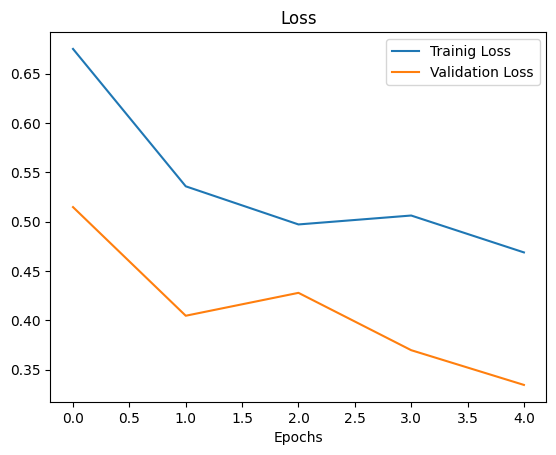

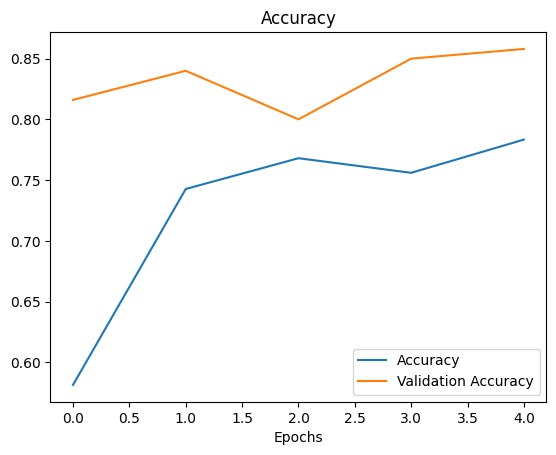

In [ ]:
plot_loss(history_8)

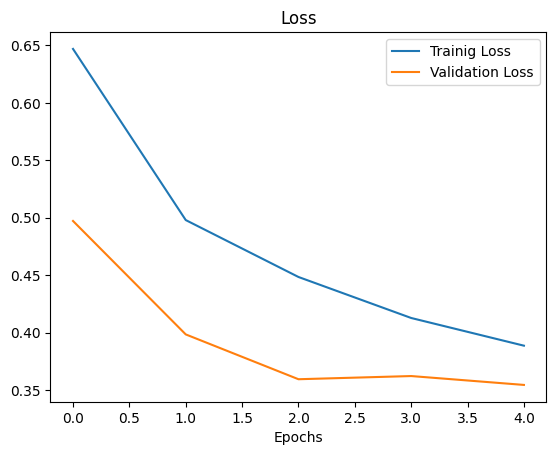

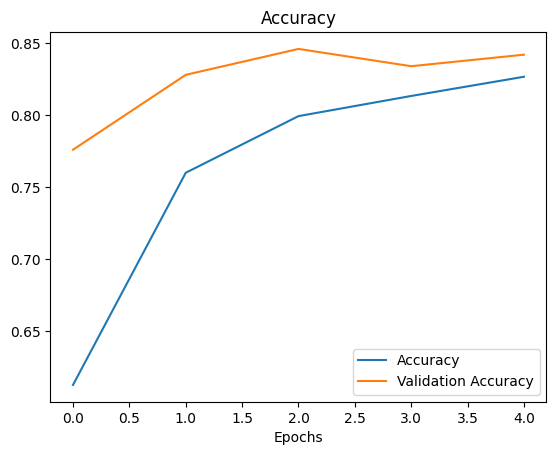

In [ ]:
plot_loss(history_1)

Hmm, our training curves are looking good, but our model's performance on the training and test sets didn't improve much compared to the previous model.

Taking another loook at the training curves, it looks like our model's performance might improve if we trained it a little longer (more epochs).

## Making a prediction with our trained model
What good is a trained model if you can't make predictions with it?

To really test it out, we'll upload a couple of our own images and see how the model goes.

First, let's remind ourselves of the classnames and view the image we're going to test on.

In [ ]:
print(class_names)

['pizza' 'steak']


--2023-11-03 11:21:17--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  --.-KB/s    in 0.05s   

2023-11-03 11:21:18 (41.2 MB/s) - ‘03-steak.jpeg’ saved [1978213/1978213]



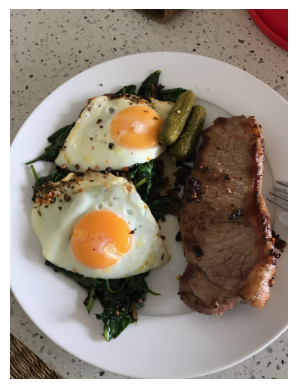

In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
steak = mpimg.imread("03-steak.jpeg")
plt.imshow(steak)
plt.axis("off")
plt.show()

In [ ]:
steak.shape

(4032, 3024, 3)

Since our model takes in images of shapes (224, 224, 3), we've got to reshape our custom image to use it with our model.

To do so, we can import and decode our image using tf.io.read_file (for readining files) and tf.image (for resizing our image and turning it into a tensor).

>🔑 Note: For your model to make predictions on unseen data, for example, your own custom images, the custom image has to be in the same shape as your model has been trained on. In more general terms, to make predictions on custom data it has to be in the same form that your model has been trained on.

In [ ]:
def load_and_prep_image(filename, img_shape = 224):
  """
  Reads an image from filename, turns it into a tensor
  and reshapes it to (img_shape, img_shape, colour_channel).
  """
  # Read in target file (an image)
  img = tf.io.read_file(filename)

  # Decode the read file into a tensor & ensure 3 colour channels
  # (our model is trained on images with 3 colour channels and sometimes images have 4 colour channels)
  img = tf.image.decode_image(img, channels = 3)

  # Resize the image (to the same size our model was trained on)
  img = tf.image.resize(img, size = [img_shape, img_shape])

  img = img/255

  return img

In [ ]:
steak = load_and_prep_image("03-steak.jpeg")
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

In [ ]:
model_8.predict(steak)

ValueError: ignored


There's one more problem...

Although our image is in the same shape as the images our model has been trained on, we're still missing a dimension.

Remember how our model was trained in batches?

Well, the batch size becomes the first dimension.

So in reality, our model was trained on data in the shape of (batch_size, 224, 224, 3).

We can fix this by adding an extra to our custom image tensor using tf.expand_dims.

In [ ]:
print(f"Shape before new dimension: {steak.shape}")

steak = tf.expand_dims(steak, axis = 0)

print(f"Shape after expanding: {steak.shape}")
steak

Shape before new dimension: (224, 224, 3)
Shape after expanding: (1, 224, 224, 3)


<tf.Tensor: shape=(1, 224, 224, 3), dtype=float32, numpy=
array([[[[0.6377451 , 0.6220588 , 0.57892156],
         [0.6504902 , 0.63186276, 0.5897059 ],
         [0.63186276, 0.60833335, 0.5612745 ],
         ...,
         [0.52156866, 0.05098039, 0.09019608],
         [0.49509802, 0.04215686, 0.07058824],
         [0.52843136, 0.07745098, 0.10490196]],

        [[0.6617647 , 0.6460784 , 0.6107843 ],
         [0.6387255 , 0.6230392 , 0.57598037],
         [0.65588236, 0.63235295, 0.5852941 ],
         ...,
         [0.5352941 , 0.06862745, 0.09215686],
         [0.529902  , 0.05931373, 0.09460784],
         [0.5142157 , 0.05539216, 0.08676471]],

        [[0.6519608 , 0.6362745 , 0.5892157 ],
         [0.6392157 , 0.6137255 , 0.56764704],
         [0.65637255, 0.6269608 , 0.5828431 ],
         ...,
         [0.53137255, 0.06470589, 0.08039216],
         [0.527451  , 0.06862745, 0.1       ],
         [0.52254903, 0.05196078, 0.0872549 ]],

        ...,

        [[0.49313724, 0.42745098, 

In [ ]:
pred = model_8.predict(steak)
pred

1/1 [==============================] - 0s 181ms/step


array([[0.89367276]], dtype=float32)

Ahh, the predictions come out in prediction probability form. In other words, this means how likely the image is to be one class or another.

Since we're working with a binary classification problem, if the prediction probability is over 0.5, according to the model, the prediction is most likely to be the postive class (class 1).

And if the prediction probability is under 0.5, according to the model, the predicted class is most likely to be the negative class (class 0).

>🔑 Note: The 0.5 cutoff can be adjusted to your liking. For example, you could set the limit to be 0.8 and over for the positive class and 0.2 for the negative class. However, doing this will almost always change your model's performance metrics so be sure to make sure they change in the right direction.

But saying positive and negative class doesn't make much sense when we're working with pizza 🍕 and steak 🥩...

So let's write a little function to convert predictions into their class names and then plot the target image.

In [ ]:
class_names

array(['pizza', 'steak'], dtype='<U5')

In [ ]:
pred_class = class_names[int(tf.round(pred))]

pred_class

'steak'

In [ ]:
def pred_and_plot(model, filename, class_names):
  img = load_and_prep_image(filename)

  pred = model.predict(tf.expand_dims(img, axis = 0))

  pred_class = class_names[int(tf.round(pred))]

  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis("off")
  plt.show()

1/1 [==============================] - 0s 30ms/step


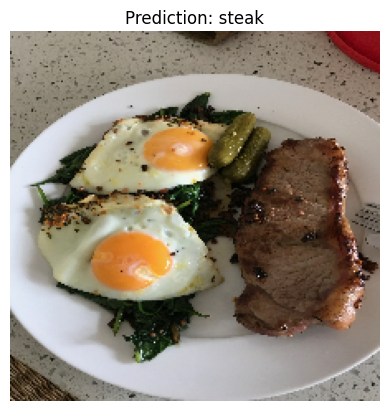

In [ ]:
pred_and_plot(model_8, "03-steak.jpeg", class_names)

--2023-11-03 11:22:36--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg’

03-pizza-dad.jpeg   100%[===================>]   2.74M  --.-KB/s    in 0.05s   

2023-11-03 11:22:36 (58.6 MB/s) - ‘03-pizza-dad.jpeg’ saved [2874848/2874848]

1/1 [==============================] - 0s 18ms/step


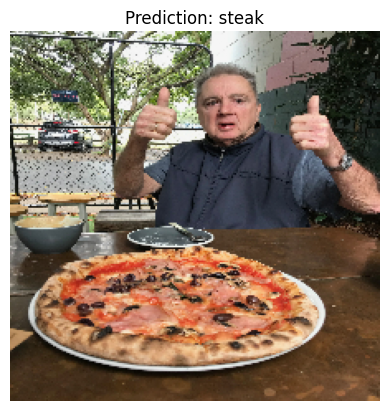

In [ ]:
# Download another test image and make a prediction on it
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
pred_and_plot(model_8, "03-pizza-dad.jpeg", class_names)

## Multi-class Classification
We've referenced the TinyVGG architecture from the CNN Explainer website multiple times through this notebook, however, the CNN Explainer website works with 10 different image classes, where as our current model only works with two classes (pizza and steak).

🛠 Practice: Before scrolling down, how do you think we might change our model to work with 10 classes of the same kind of images? Assume the data is in the same style as our two class problem.

Remember the steps we took before to build our pizza 🍕 vs. steak 🥩 classifier?

How about we go through those steps again, except this time, we'll work with 10 different types of food.

1.Become one with the data (visualize, visualize, visualize...)
2.Preprocess the data (prepare it for a model)
3.Create a model (start with a baseline)
4.Fit the model
5.Evaluate the model
6.Adjust different parameters and improve model (try to beat your baseline)
7.Repeat until satisfied

## 1. Import and become one with the data
Again, we've got a subset of the Food101 dataset. In addition to the pizza and steak images, we've pulled out another eight classes.

In [ ]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2023-11-03 11:22:53--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.203.207, 74.125.199.207, 74.125.20.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.203.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M   237MB/s    in 2.1s    

2023-11-03 11:22:55 (237 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [ ]:
import os
for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/test'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/steak'.
There are 

In [ ]:
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [ ]:
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


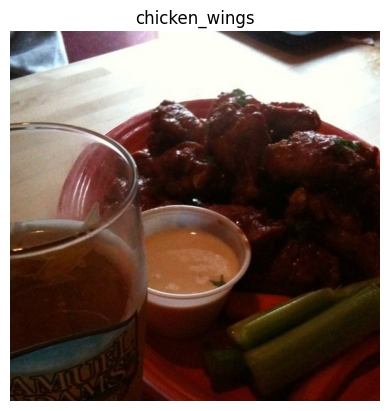

Image shape: (512, 512, 3)


In [ ]:
import random
img = view_random_image(train_dir, random.choice(class_names))

## 2. Preprocess the data (prepare it for a model)
After going through a handful of images (it's good to visualize at least 10-100 different examples), it looks like our data directories are setup correctly.

Time to preprocess the data.

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1/255.)
test_datagen = ImageDataGenerator(rescale = 1/255.)

train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size = (224, 224),
                                               class_mode = "categorical",
                                               batch_size = 32)

test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size = (224, 224),
                                             class_mode = "categorical",
                                             batch_size = 32)



Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


As with binary classifcation, we've creator image generators. The main change this time is that we've changed the class_mode parameter to 'categorical' because we're dealing with 10 classes of food images.

Everything else like rescaling the images, creating the batch size and target image size stay the same.

>🤔 Question: Why is the image size 224x224? This could actually be any size we wanted, however, 224x224 is a very common size for preprocessing images to. Depending on your problem you might want to use larger or smaller images.


## 3. Create a model (start with a baseline)
We can use the same model (TinyVGG) we used for the binary classification problem for our multi-class classification problem with a couple of small tweaks.

Namely:

* Changing the output layer to use have 10 ouput neurons (the same number as the number of classes we have).
* Changing the output layer to use 'softmax' activation instead of 'sigmoid' activation.
* Changing the loss function to be 'categorical_crossentropy' instead of 'binary_crossentropy'.


In [ ]:
import tensorflow as tf

model_9 = tf.keras.Sequential()
model_9.add(tf.keras.layers.Conv2D(10, 3, activation = "relu", input_shape = (224, 224, 3)))
model_9.add(tf.keras.layers.Conv2D(10, 3, activation = "relu"))
model_9.add(tf.keras.layers.MaxPool2D())
model_9.add(tf.keras.layers.Conv2D(10, 3, activation = "relu"))
model_9.add(tf.keras.layers.Conv2D(10, 3, activation = "relu"))
model_9.add(tf.keras.layers.MaxPool2D())
model_9.add(tf.keras.layers.Flatten())
model_9.add(tf.keras.layers.Dense(10, activation = "softmax"))


model_9.compile(loss = "categorical_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

In [ ]:
history_9 = model_9.fit(train_data,
            epochs = 5,
            steps_per_epoch = len(train_data),
            validation_data = train_data,
            validation_steps= len(test_data))

Epoch 1/5
235/235 [==============================] - 33s 136ms/step - loss: 2.1763 - accuracy: 0.1937 - val_loss: 1.9611 - val_accuracy: 0.3188
Epoch 2/5
235/235 [==============================] - 34s 143ms/step - loss: 1.9021 - accuracy: 0.3433 - val_loss: 1.6790 - val_accuracy: 0.4573
Epoch 3/5
235/235 [==============================] - 28s 119ms/step - loss: 1.6468 - accuracy: 0.4445 - val_loss: 1.3034 - val_accuracy: 0.6040
Epoch 4/5
235/235 [==============================] - 33s 140ms/step - loss: 1.1946 - accuracy: 0.6015 - val_loss: 0.6764 - val_accuracy: 0.8216
Epoch 5/5
235/235 [==============================] - 28s 118ms/step - loss: 0.5920 - accuracy: 0.8148 - val_loss: 0.2767 - val_accuracy: 0.9248


Why do you think each epoch takes longer than when working with only two classes of images?

It's because we're now dealing with more images than we were before. We've got 10 classes with 750 training images and 250 validation images each totalling 10,000 images. Where as when we had two classes, we had 1500 training images and 500 validation images, totalling 2000.

The intuitive reasoning here is the more data you have, the longer a model will take to find patterns


## 5. Evaluate the model
Woohoo! We've just trained a model on 10 different classes of food images, let's see how it went.

In [ ]:
model_9.evaluate(test_data)

79/79 [==============================] - 10s 126ms/step - loss: 2.8264 - accuracy: 0.3108


[2.8263673782348633, 0.3107999861240387]

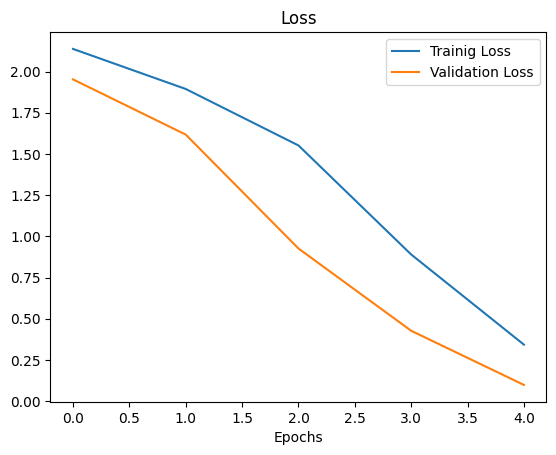

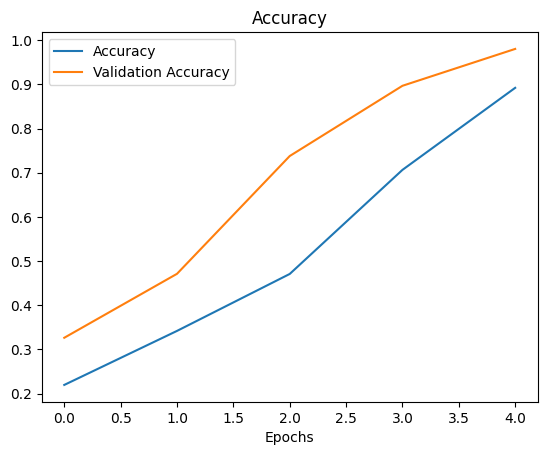

In [ ]:
plot_loss(history_9)

Woah, that's quite the gap between the training and validation loss curves.

What does this tell us?

It seems our model is overfitting the training set quite badly. In other words, it's getting great results on the training data but fails to generalize well to unseen data and performs poorly on the test data.

6. Adjust the model parameters
Due to its performance on the training data, it's clear our model is learning something. However, performing well on the training data is like going well in the classroom but failing to use your skills in real life.

Ideally, we'd like our model to perform as well on the test data as it does on the training data.

So our next steps will be to try and prevent our model overfitting. A couple of ways to prevent overfitting include:

* **Get more data** - Having more data gives the model more opportunities to learn patterns, patterns which may be more generalizable to new examples.
* **Simplify model** - If the current model is already overfitting the training data, it may be too complicated of a model. This means it's learning the patterns of the data too well and isn't able to generalize well to unseen data. One way to simplify a model is to reduce the number of layers it uses or to reduce the number of hidden units in each layer.
* **Use data augmentation** - Data augmentation manipulates the training data in a way so that's harder for the model to learn as it artificially adds more variety to the data. If a model is able to learn patterns in augmented data, the model may be able to generalize better to unseen data.
* **Use transfer learning** - Transfer learning involves leverages the patterns (also called pretrained weights) one model has learned to use as the foundation for your own task. In our case, we could use one computer vision model pretrained on a large variety of images and then tweak it slightly to be more specialized for food images.
>🔑 Note: Preventing overfitting is also referred to as regularization.

If you've already got an existing dataset, you're probably most likely to try one or a combination of the last three above options first.

Since collecting more data would involve us manually taking more images of food, let's try the ones we can do from right within the notebook.

How about we simplify our model first?

To do so, we'll remove two of the convolutional layers, taking the total number of convolutional layers from four to two.

In [ ]:
model_10 = Sequential([
    Conv2D(10, 3, activation = "relu", input_shape = (224, 224, 3)),
    MaxPool2D(),
    Conv2D(10, 3, activation = "relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation = "softmax")
])

model_10.compile(loss = "categorical_crossentropy",
                 optimizer = tf.keras.optimizers.Adam(),
                 metrics = ["accuracy"])


history_10 = model_10.fit(train_data,
                          epochs = 5,
                          steps_per_epoch = len(train_data),
                          validation_data = test_data,
                          validation_steps = len(test_data))


Epoch 1/5
235/235 [==============================] - 30s 124ms/step - loss: 2.1447 - accuracy: 0.2280 - val_loss: 1.9478 - val_accuracy: 0.3084
Epoch 2/5
235/235 [==============================] - 27s 114ms/step - loss: 1.7275 - accuracy: 0.4132 - val_loss: 1.9263 - val_accuracy: 0.3200
Epoch 3/5
235/235 [==============================] - 27s 115ms/step - loss: 1.1749 - accuracy: 0.6340 - val_loss: 2.0589 - val_accuracy: 0.3108
Epoch 4/5
235/235 [==============================] - 28s 119ms/step - loss: 0.6475 - accuracy: 0.8133 - val_loss: 2.4208 - val_accuracy: 0.2872
Epoch 5/5
235/235 [==============================] - 27s 115ms/step - loss: 0.2838 - accuracy: 0.9327 - val_loss: 2.9506 - val_accuracy: 0.2900


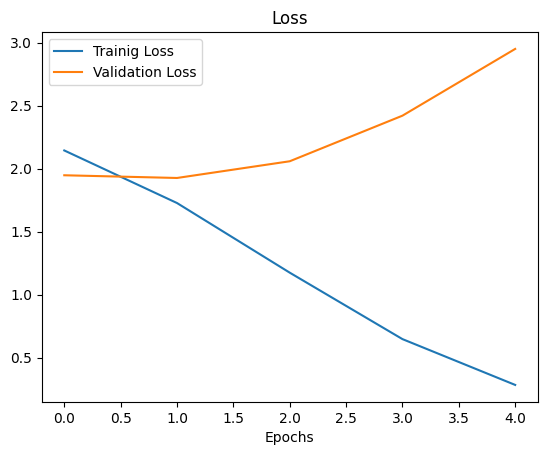

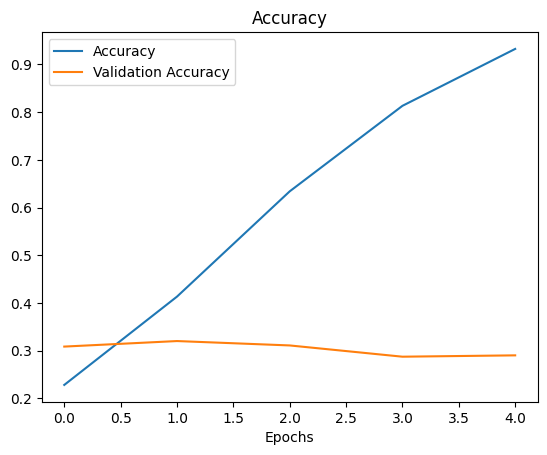

In [ ]:
plot_loss(history_10)

Hmm... even with a simplifed model, it looks like our model is still dramatically overfitting the training data.

What else could we try?

How about data augmentation?

Data augmentation makes it harder for the model to learn on the training data and in turn, hopefully making the patterns it learns more generalizable to unseen data.

To create augmented data, we'll recreate a new ImageDataGenerator instance, this time adding some parameters such as rotation_range and horizontal_flip to manipulate our images.

In [ ]:
train_datagen_augmented = ImageDataGenerator(rescale = 1/255.,
                                             horizontal_flip = True,
                                             height_shift_range = 0.2,
                                             rotation_range = 20,
                                             width_shift_range = 0.2,
                                             zoom_range = 0.2,
                                             )

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size = (224, 224),
                                                                   batch_size = 32,
                                                                   class_mode = "categorical")

Found 7500 images belonging to 10 classes.


In [ ]:
model_11 = tf.keras.models.clone_model(model_10)

model_11.compile(loss = "categorical_crossentropy",
                 optimizer = tf.keras.optimizers.Adam(),
                 metrics = ["accuracy"])


history_11 = model_11.fit(train_data,
                          epochs = 5,
                          steps_per_epoch = len(train_data),
                          validation_data = test_data,
                          validation_steps = len(test_data))


Epoch 1/5
235/235 [==============================] - 29s 120ms/step - loss: 2.1208 - accuracy: 0.2384 - val_loss: 1.9108 - val_accuracy: 0.3240
Epoch 2/5
235/235 [==============================] - 27s 115ms/step - loss: 1.7265 - accuracy: 0.4252 - val_loss: 1.8923 - val_accuracy: 0.3324
Epoch 3/5
235/235 [==============================] - 27s 116ms/step - loss: 1.3735 - accuracy: 0.5641 - val_loss: 1.9348 - val_accuracy: 0.3396
Epoch 4/5
235/235 [==============================] - 27s 114ms/step - loss: 0.9389 - accuracy: 0.7217 - val_loss: 2.0365 - val_accuracy: 0.3352
Epoch 5/5
235/235 [==============================] - 26s 112ms/step - loss: 0.5230 - accuracy: 0.8589 - val_loss: 2.4190 - val_accuracy: 0.3316


In [ ]:
model_11.evaluate(test_data)

79/79 [==============================] - 8s 105ms/step - loss: 2.4190 - accuracy: 0.3316


[2.4189555644989014, 0.33160001039505005]

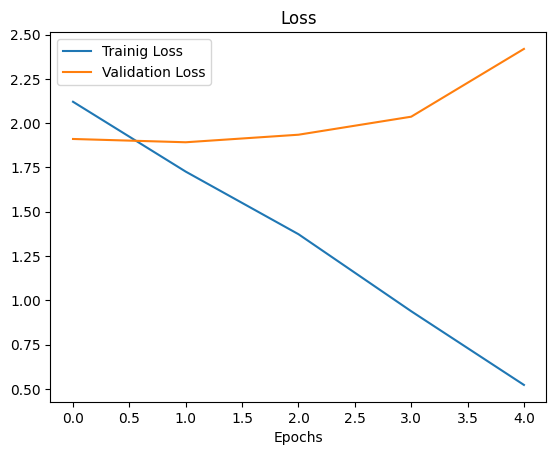

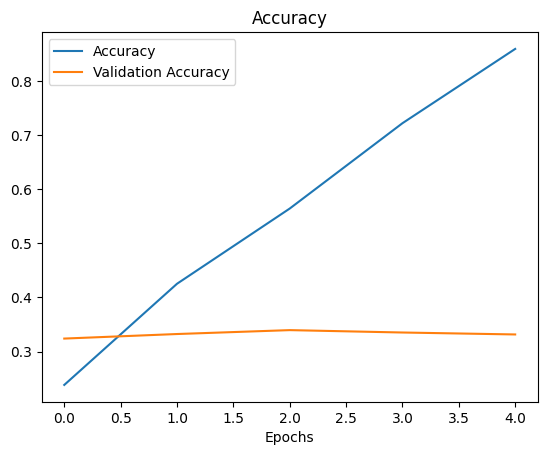

In [ ]:
plot_loss(history_11)

Woah! That's looking much better, the loss curves are much closer to eachother. Although our model didn't perform as well on the augmented training set, it performed much better on the validation dataset.

It even looks like if we kept it training for longer (more epochs) the evaluation metrics might continue to improve.

## 7. Repeat until satisfied
We could keep going here. Restructuring our model's architecture, adding more layers, trying it out, adjusting the learning rate, trying it out, trying different methods of data augmentation, training for longer. But as you could image, this could take a fairly long time.

Good thing there's still one trick we haven't tried yet and that's transfer learning.

However, we'll save that for the next notebook where you'll see how rather than design our own models from scratch we leverage the patterns another model has learned for our own task.

In the meantime, let's make a prediction with our trained multi-class model.

Making a prediction with our trained model
What good is a model if you can't make predictions with it?

Let's first remind ourselves of the classes our multi-class model has been trained on and then we'll download some of own custom images to work with.

## Making Prediction With Our Model

In [ ]:
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [ ]:
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg

1/1 [==============================] - 0s 120ms/step


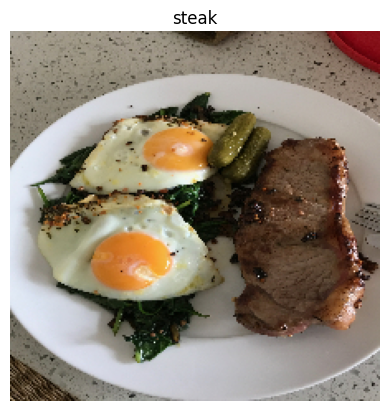

In [ ]:
img = load_and_prep_image("03-steak.jpeg")
pred = model_11.predict(tf.expand_dims(img, axis = 0))
pred_class = class_names[pred.argmax()]

plt.imshow(img)
plt.title(pred_class)
plt.axis(False)
plt.show()

In [ ]:
pred = model_11.predict(tf.expand_dims(img, axis = 0))

pred

1/1 [==============================] - 0s 32ms/step


array([[0.00158869, 0.00659556, 0.0015697 , 0.017356  , 0.18559894,
        0.0732427 , 0.00898245, 0.07501658, 0.6044284 , 0.0256209 ]],
      dtype=float32)

In [ ]:
def pred_and_plot(model, filename, class_names):
  img = load_and_prep_image(filename)

  pred = model.predict(tf.expand_dims(img, axis = 0))


  if len(pred[0]) > 1 :
    pred_class = class_names[pred.argmax()]
  else:
    pred_class = class_names[int(tf.round(pred[0][0]))]

  plt.imshow(img)
  plt.title(pred_class)
  plt.axis(False)
  plt.show()

1/1 [==============================] - 0s 26ms/step


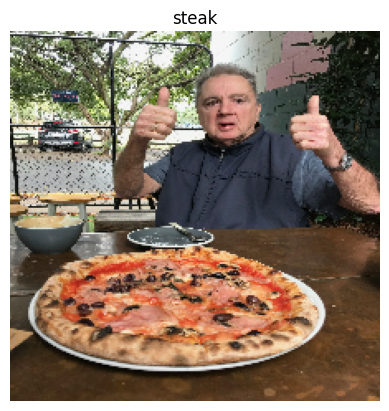

In [ ]:
pred_and_plot(model_11, "03-pizza-dad.jpeg", class_names)

1/1 [==============================] - 0s 25ms/step


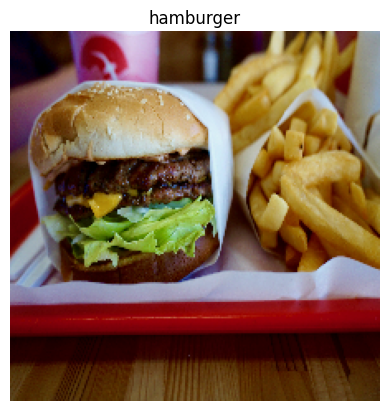

In [ ]:
pred_and_plot(model_11, "03-hamburger.jpeg", class_names)

1/1 [==============================] - 0s 89ms/step


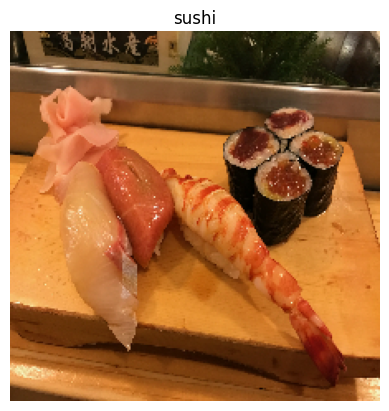

In [ ]:
pred_and_plot(model_11, "03-sushi.jpeg", class_names)